# Major Leagues
    As a fan of Kobe Bryant, I choose NBA dataset for investigation. For this project, i'm using regression models to predict the score for each team. The models used are: 
        1. Linear Regression
        2. Random Forest 
        3. Gradient Boosting  

In [1]:
# Load libraies
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale

# Load Data Frames

In [2]:
#load Raw Data
data_NBA = pd.read_csv("../data/nba_elo.csv",encoding ='latin' ,low_memory =False)
print(data_NBA.shape)
data_NBA.head(5)

(69636, 24)


,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,68.0
1,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,47.0
2,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,53.0
3,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,51.0
4,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,50.0


In [3]:
data_NBA.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1', 'carm-elo_prob2',
       'carm-elo1_post', 'carm-elo2_post', 'raptor1_pre', 'raptor2_pre',
       'raptor_prob1', 'raptor_prob2', 'score1', 'score2'],
      dtype='object')

In [4]:
# Column carm-elo1_pre, carm-elo2_pre, carm-elo_prob1, carm-elo_prob2, carm-elo1_post, carm-elo2_post, raptor1_pre, raptor2_pre, raptor_prob1, raptor_prob1 are empty, should be dropped.
data_NBA = data_NBA.drop(columns = ['playoff','elo1_post','elo2_post','carm-elo1_pre','carm-elo2_pre','carm-elo_prob1','carm-elo_prob2','carm-elo1_post','carm-elo2_post', 'raptor1_pre', 'raptor2_pre',
       'raptor_prob1', 'raptor_prob2'])

In [5]:
object = LabelEncoder()
data_NBA['team1'] = object.fit_transform(data_NBA['team1'].astype('str'))
data_NBA['team2'] = object.fit_transform(data_NBA['team1'].astype('str'))
data_NBA  = data_NBA.drop(columns = ['date'])

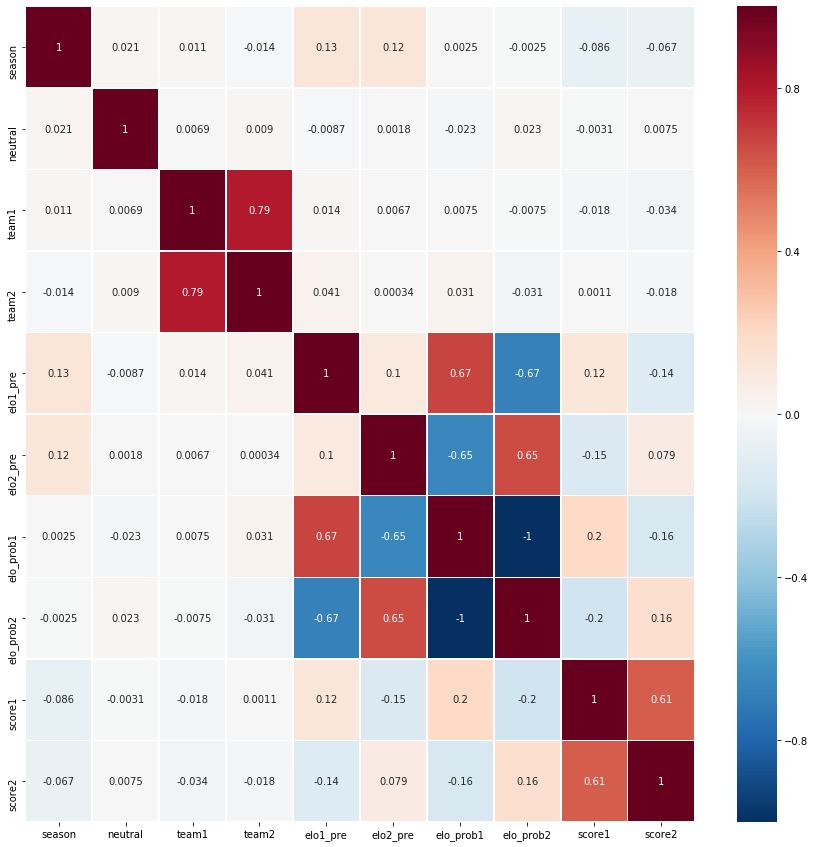

In [6]:
pearsoncorr = data_NBA.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [7]:
data_NBA = data_NBA.dropna()

# Process the dataframe
    1. Normalize features
    2. Split training set and testing set

In [9]:
Y = pd.DataFrame(data_NBA[['score1','score2']])
scaler = StandardScaler()
features = ['season','team1','team2','elo1_pre','elo2_pre','elo_prob1','elo_prob2']
X = pd.DataFrame(data_NBA[features])
scaler.fit(X)
X.head(5)

,season,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2
0,1947,91,93,1300.0,1300.0000,0.640065,0.359935
1,1947,14,8,1300.0,1306.7233,0.631101,0.368899
2,1947,71,71,1300.0,1300.0000,0.640065,0.359935
3,1947,86,87,1300.0,1300.0000,0.640065,0.359935
4,1947,26,21,1300.0,1300.0000,0.640065,0.359935


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 27)
Result = pd.DataFrame(y_test)

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
y_train1 = y_train['score1']
y_train2 = y_train['score2']
y_test1 =  y_test['score1']
y_test2 =  y_test['score2']

In [13]:
X_test.shape

(13757, 7)

# linear Regression
    Using mean squared error to measure the regression model. 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#since the result for regression both score1 and score is way too bad, i'll regression score1 and score2 seperately.
# The reason could be, the accuracy for predict score1 or score2 could be 60%, the accuracy to regress them together could be less than 36%.
# Create a dataframe for score. 

reg1 = LinearRegression().fit(X_train, y_train1)
reg2 = LinearRegression().fit(X_train, y_train2)

reg_train1 = reg1.predict(X_train) 
reg_test1 = reg1.predict(X_test)

reg_train2 = reg2.predict(X_train) 
reg_test2 = reg2.predict(X_test)

from sklearn.metrics import mean_squared_error
print('train error for score1: ' + str(mean_squared_error(y_train1, reg_train1)))
print('test error for score1: ' + str(mean_squared_error(y_test1, reg_test1)))

print('train error for score2: ' + str(mean_squared_error(y_train2, reg_train2)))
print('test error score2: ' + str(mean_squared_error(y_test2, reg_test2)))

train error for score1: 208.92550826288598
test error for score1: 211.78215825261185
train error for score2: 198.35454802025413
test error score2: 194.91435345162006


In [15]:
Result["LR_1"] = reg_test1
Result["LR_2"] = reg_test2

In [16]:
Result.head(10)

,score1,score2,LR_1,LR_2
27060,107.0,83.0,105.354596,102.070280
31624,120.0,101.0,105.718838,99.302433
43344,103.0,91.0,106.982531,98.717090
14684,102.0,104.0,105.469204,101.999830
42965,89.0,92.0,100.900955,103.975087
16523,110.0,100.0,111.688154,100.766816
29973,106.0,112.0,104.040240,100.851771
49244,86.0,92.0,104.346471,99.887605
41036,116.0,109.0,107.623076,97.167794
68430,95.0,86.0,100.217918,101.898396


# Random Forest

In [17]:
reg1 = RandomForestRegressor(n_estimators=100).fit(X_train, y_train1)
reg2 = RandomForestRegressor(n_estimators=100).fit(X_train, y_train2)

reg_train1 = reg1.predict(X_train) 
reg_test1 = reg1.predict(X_test)

reg_train2 = reg2.predict(X_train) 
reg_test2 = reg2.predict(X_test)

from sklearn.metrics import mean_squared_error
print('train error for score1: ' + str(mean_squared_error(y_train1, reg_train1)))
print('test error for score1: ' + str(mean_squared_error(y_test1, reg_test1)))

print('train error for score2: ' + str(mean_squared_error(y_train2, reg_train2)))
print('test error score2: ' + str(mean_squared_error(y_test2, reg_test2)))

train error for score1: 20.340113709384312
test error for score1: 151.50147794577305
train error for score2: 19.143511972086934
test error score2: 136.5263293959439


In [18]:
Result["RDF_1"] = reg_test1
Result["RDF_2"] = reg_test2

In [19]:
Result.head(10)

,score1,score2,LR_1,LR_2,RDF_1,RDF_2
27060,107.0,83.0,105.354596,102.070280,108.21,100.11
31624,120.0,101.0,105.718838,99.302433,110.46,103.19
43344,103.0,91.0,106.982531,98.717090,106.06,98.67
14684,102.0,104.0,105.469204,101.999830,99.42,94.96
42965,89.0,92.0,100.900955,103.975087,97.74,98.92
16523,110.0,100.0,111.688154,100.766816,115.92,106.42
29973,106.0,112.0,104.040240,100.851771,116.50,110.42
49244,86.0,92.0,104.346471,99.887605,102.02,95.18
41036,116.0,109.0,107.623076,97.167794,106.55,97.48
68430,95.0,86.0,100.217918,101.898396,105.60,107.15


# Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor().fit(X_train, y_train1)
reg2 = GradientBoostingRegressor().fit(X_train, y_train2)

reg_train1 = reg1.predict(X_train) 
reg_test1 = reg1.predict(X_test)

reg_train2 = reg2.predict(X_train) 
reg_test2 = reg2.predict(X_test)

from sklearn.metrics import mean_squared_error
print('train error for score1: ' + str(mean_squared_error(y_train1, reg_train1)))
print('test error for score1: ' + str(mean_squared_error(y_test1, reg_test1)))

print('train error for score2: ' + str(mean_squared_error(y_train2, reg_train2)))
print('test error score2: ' + str(mean_squared_error(y_test2, reg_test2)))

train error for score1: 138.90074855385222
test error for score1: 145.9000840990876
train error for score2: 131.2233383165661
test error score2: 131.96551309252195


In [21]:
Result["GB_1"] = reg_test1
Result["GB_2"] = reg_test2

In [22]:
Result.head(10)

,score1,score2,LR_1,LR_2,RDF_1,RDF_2,GB_1,GB_2
27060,107.0,83.0,105.354596,102.070280,108.21,100.11,110.658651,106.516508
31624,120.0,101.0,105.718838,99.302433,110.46,103.19,111.348433,104.516898
43344,103.0,91.0,106.982531,98.717090,106.06,98.67,98.937965,91.618694
14684,102.0,104.0,105.469204,101.999830,99.42,94.96,107.782552,104.650581
42965,89.0,92.0,100.900955,103.975087,97.74,98.92,95.655964,98.265596
16523,110.0,100.0,111.688154,100.766816,115.92,106.42,112.938784,103.795016
29973,106.0,112.0,104.040240,100.851771,116.50,110.42,110.759002,105.759683
49244,86.0,92.0,104.346471,99.887605,102.02,95.18,98.156752,94.317449
41036,116.0,109.0,107.623076,97.167794,106.55,97.48,101.613075,90.620865
68430,95.0,86.0,100.217918,101.898396,105.60,107.15,108.837081,110.327926


# Visualize the result
    Comparing to plot the ground truth scores and the predicted scores, the absolute difference of the ground truth and the predicted values could be more clear to view. 
        1. Absolute error of the predicted values using various models for score1
        2. Absolute error of the predicted values using various models for score2

In [23]:
Score_1 = pd.DataFrame(Result[['score1','LR_1','RDF_1','GB_1']])
Score_2 = pd.DataFrame(Result[['score2','LR_2','RDF_2','GB_2']])

Score_1['LR_error'] = abs(Score_1.score1 - Score_1.LR_1)
Score_1['RDF_error'] = abs(Score_1.score1 - Score_1.RDF_1)
Score_1['GB_error'] = abs(Score_1.score1 - Score_1.GB_1)

Score_2['LR_error'] = abs(Score_2.score2 - Score_2.LR_2)
Score_2['RDF_error'] = abs(Score_2.score2 - Score_2.RDF_2)
Score_2['GB_error'] = abs(Score_2.score2 - Score_2.GB_2)

In [24]:
Score_1.head(5)

,score1,LR_1,RDF_1,GB_1,LR_error,RDF_error,GB_error
27060,107.0,105.354596,108.21,110.658651,1.645404,1.21,3.658651
31624,120.0,105.718838,110.46,111.348433,14.281162,9.54,8.651567
43344,103.0,106.982531,106.06,98.937965,3.982531,3.06,4.062035
14684,102.0,105.469204,99.42,107.782552,3.469204,2.58,5.782552
42965,89.0,100.900955,97.74,95.655964,11.900955,8.74,6.655964


In [25]:
Score_2.head(5)

,score2,LR_2,RDF_2,GB_2,LR_error,RDF_error,GB_error
27060,83.0,102.070280,100.11,106.516508,19.070280,17.11,23.516508
31624,101.0,99.302433,103.19,104.516898,1.697567,2.19,3.516898
43344,91.0,98.717090,98.67,91.618694,7.717090,7.67,0.618694
14684,104.0,101.999830,94.96,104.650581,2.000170,9.04,0.650581
42965,92.0,103.975087,98.92,98.265596,11.975087,6.92,6.265596


In [26]:
Score_1 = Score_1.iloc[:50]
Score_2 = Score_2.iloc[:50]

In [27]:
bar1 = Score_1.LR_error
bar2 = Score_1.RDF_error
bar3 = Score_1.GB_error

In [28]:
barWidth = 0.25
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

<BarContainer object of 50 artists>

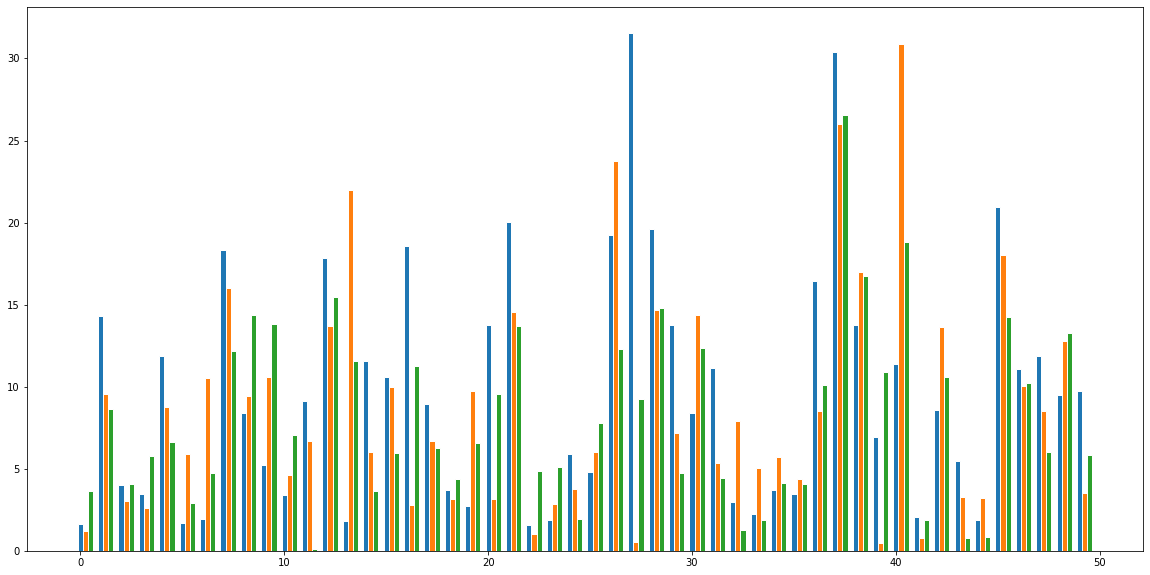

In [32]:
plt.figure(figsize=(20,10))
plt.bar(r1, bar1, color='C0', width=barWidth, edgecolor='white', label='LR_error')
plt.bar(r2, bar2, color='C1', width=barWidth, edgecolor='white', label='RDF_error')
plt.bar(r3, bar3, color='C2', width=barWidth, edgecolor='white', label='GB_error')

In [30]:
bar4 = Score_1.LR_error
bar5 = Score_1.RDF_error
bar6 = Score_1.GB_error

<BarContainer object of 50 artists>

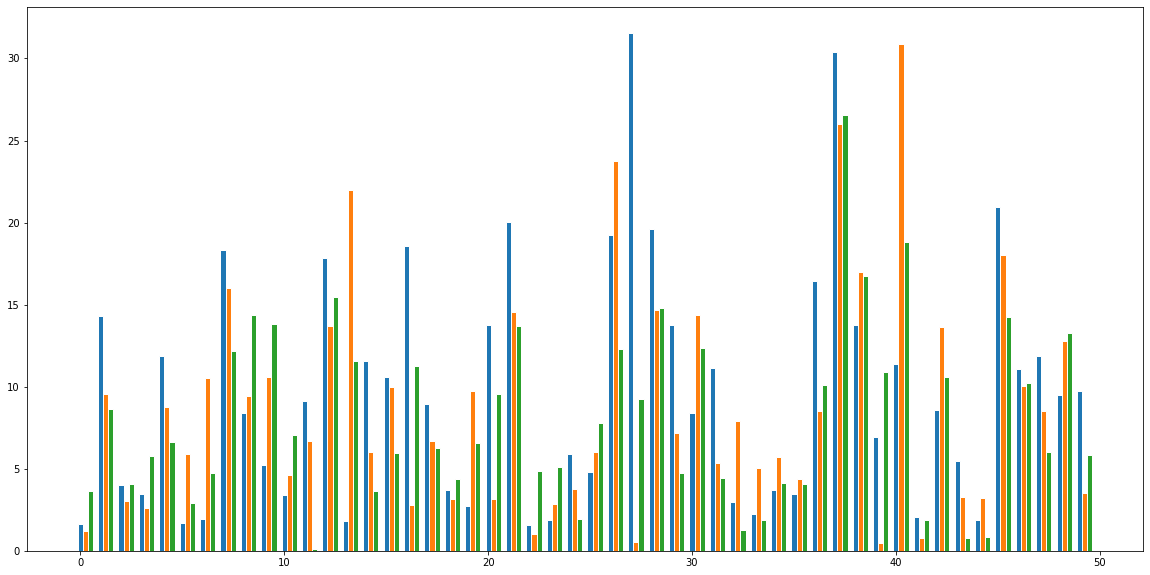

In [33]:
plt.figure(figsize=(20,10))
plt.bar(r1, bar4, color='C0', width=barWidth, edgecolor='white', label='LR_error')
plt.bar(r2, bar5, color='C1', width=barWidth, edgecolor='white', label='RDF_error')
plt.bar(r3, bar6, color='C2', width=barWidth, edgecolor='white', label='GB_error')

# Conclusion:
     For score1 regression:
        1. Gradient Boosting
        2. Random Forest
        3. Linear Regression
        
     For score2 regression:
        1. Gradient Boosting 
        2. Random Forest
        3. Linear Regression 
     
     For this project, gradient boosting regression model overperforms the rest two. 
     